# CSCI-B 565

## Homework 2

John Koo

### Problem 1

I will code up these similarity metrics in Python instead of computing them by hand.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def dot_prod(x, y):
    return np.sum(x * y)


def norm(x):
    return np.sqrt(dot_prod(x, x))


def cos_sim(x, y):
    return dot_prod(x, y) / norm(x) / norm(y)


def euclidean_dist(x, y):
    return norm(x - y)


def correlation(x, y):
    return \
        np.sum((x - np.mean(x)) * (y - np.mean(y))) / \
        np.sqrt(np.sum((x - np.mean(x)) ** 2) * \
                np.sum((y - np.mean(y)) ** 2))


def jaccard(x, y):
    union = 0
    intersection = 0
    for i in range(len(x)):
        if x[i] + y[i] > 0:
            union += 1
            if x[i] == y[i]:
                intersection += 1
    
    return intersection / union

In [3]:
x = np.array([1, 1, 1, 1])
y = np.array([2, 2, 2, 2])

print(cos_sim(x, y))
print(correlation(x, y))  # stdev of x and y are 0
print(euclidean_dist(x, y))

1.0
nan
2.0


/home/johnkoo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


In [4]:
x = np.array([0, 1, 0, 1])
y = np.array([1, 0, 1, 0])

print(cos_sim(x, y))
print(correlation(x, y))
print(jaccard(x, y))

0.0
-1.0
0.0


In [5]:
x = np.array([0, -1, 0, 1])
y = np.array([1, 0, -1, 0])

print(cos_sim(x, y))
print(correlation(x, y))
print(euclidean_dist(x, y))

0.0
0.0
2.0


In [6]:
x = np.array([1, 1, 0, 1, 0, 1])
y = np.array([1, 1, 1, 0, 0, 1])

print(cos_sim(x, y))
print(correlation(x, y))
print(jaccard(x, y))

0.75
0.25
0.6


In [7]:
x = np.array([2, -1, 0, 2, 0, -3])
y = np.array([-1, 1, -1, 0, 0, -1])

print(cos_sim(x, y))
print(correlation(x, y))

0.0
-5.73316704659901e-17


### Problem 2

Correlation is equivalent to cosine similarity if the vectors $x$ and $y$ have means equal to 0. 

### Problem 3

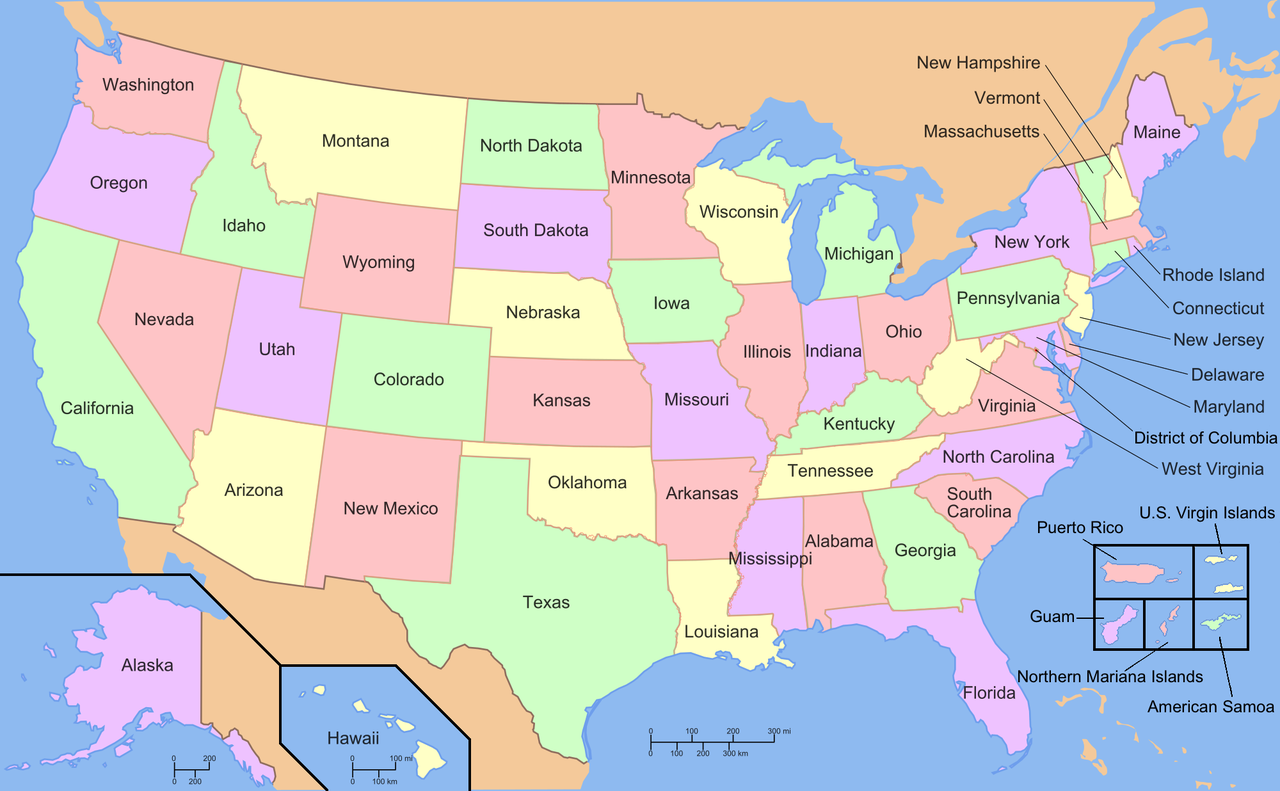  
Source: Wikipedia

In [8]:
states = ['IN', 'MI', 'OH', 'KY', 'IL', 'TN', 'AR',
          'MO', 'IA', 'WI', 'MN', 'MS', 'AL']

D = np.array([[0, 1, 1, 1, 1, 2, 3, 2, 2, 2, 3, 3, 3],
              [0, 0, 1, 2, 2, 3, 4, 3, 3, 1, 2, 4, 4], 
              [0, 0, 0, 1, 2, 2, 3, 3, 3, 3, 4, 3, 3], 
              [0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 3, 2, 2], 
              [0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 2, 3, 3], 
              [0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 3, 1, 1], 
              [0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 1, 2], 
              [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2], 
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3], 
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 4], 
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4], 
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
D = D + D.T

In [9]:
# using classical multidimensional scaling
def cmds(dist_matrix, k = 2):
    # transform a distance matrix to a kernel matrix
    n = dist_matrix.shape[0]
    J = np.ones((n, n))
    P = np.diag(np.ones(n)) - J / n
    B = -.5 * np.matmul(P, np.matmul(dist_matrix ** 2, P))
    
    # spectral decomposition of the kernel matrix
    eigvals, eigvecs = np.linalg.eig(B)
    
    # get the first k coordinates
    return eigvecs[:, 0:k] * np.sqrt(eigvals[0:k])

In [10]:
proj_values = cmds(D)

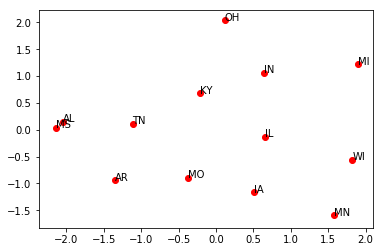

In [11]:
for i, state in enumerate(states):
    plt.scatter(proj_values[i, 0], proj_values[i, 1], color='red')
    plt.text(proj_values[i, 0], proj_values[i, 1], state)
plt.show()

At first glance, there doesn't seem to be much of a relationship between the original state positions and the projected points. But if we try rotating and reflecting the projection, we might be able to get something closer to the original map.

In [12]:
# rotate
rotation_angle = -np.pi / 2
rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                            [np.sin(rotation_angle), np.cos(rotation_angle)]])
proj_values = np.matmul(proj_values, rotation_matrix)

# reflect
proj_values[:, 0] = -proj_values[:, 0]

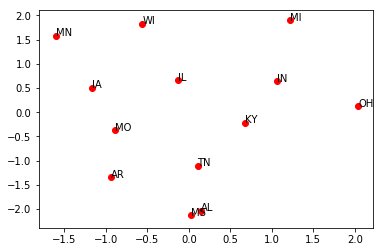

In [13]:
for i, state in enumerate(states):
    plt.scatter(proj_values[i, 0], proj_values[i, 1], color='red')
    plt.text(proj_values[i, 0], proj_values[i, 1], state)
plt.show()

### Problem 4

The triangle inequality says $||x|| + ||y|| \geq ||x + y||$ and $||x|| - ||y|| \leq ||x - y||$.

### Problem 5

Matrix of Jaccard similarities:

In [14]:
d1 = np.array([0, 1, 0, 1, 1, 0])
d2 = np.array([1, 0, 1, 1, 0, 1])
d3 = np.array([0, 1, 0, 0, 0, 0])
d4 = np.array([0, 1, 0, 1, 0, 0])
d5 = np.array([1, 0, 0, 1, 1, 1])

X = np.stack([d1, d2, d3, d4, d5], axis=1)

J = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        J[i, j] = jaccard(X[:, i], X[:, j])

J

array([[1.        , 0.16666667, 0.33333333, 0.66666667, 0.4       ],
       [0.16666667, 1.        , 0.        , 0.2       , 0.6       ],
       [0.33333333, 0.        , 1.        , 0.5       , 0.        ],
       [0.66666667, 0.2       , 0.5       , 1.        , 0.2       ],
       [0.4       , 0.6       , 0.        , 0.2       , 1.        ]])

Signature-document matrix:

In [15]:
def h1(x):
    return (2 * x + 1) % 6

def h2(x):
    return (3 * x + 2) % 6

def h3(x):
    return (5 * x + 2) % 6

def h4(x):
    return (7 * x + 3) % 6

def minhash(x, hashfunc):
    nonzeros = np.where(x == 1)[0]
    return np.min(np.array([hashfunc(y) for y in nonzeros]))

In [16]:
hashfuncs = [h1, h2, h3, h4]

hash_matrix = np.zeros((len(hashfuncs), X.shape[1]))

for i, hashfunc in enumerate(hashfuncs):
    for j in range(X.shape[1]):
        hash_matrix[i, j] = minhash(X[:, j], hashfunc)

hash_matrix

array([[1., 1., 3., 1., 1.],
       [2., 2., 5., 5., 2.],
       [1., 0., 1., 1., 2.],
       [0., 0., 4., 0., 0.]])

$h_3$ and $h_4$ are true permutations. Plugging in values $0$ to $5$, we get every number between $0$ and $5$ in $h_3$ and $h_4$, but this is not the case for $h_1$ and $h_2$.

Similarity pairs:

In [17]:
S = np.zeros((5, 5))

for i in range(5):
    for j in range(5):
        S[i, j] = np.mean(hash_matrix[:, i] == hash_matrix[:, j])

S

array([[1.  , 0.75, 0.25, 0.75, 0.75],
       [0.75, 1.  , 0.  , 0.5 , 0.75],
       [0.25, 0.  , 1.  , 0.5 , 0.  ],
       [0.75, 0.5 , 0.5 , 1.  , 0.5 ],
       [0.75, 0.75, 0.  , 0.5 , 1.  ]])

We can see that at the very least, the zeros in the Jaccard similarity matrix correspond to the zeros in the minhash signature similarity matrix. There is some correspondence between the two, but it is not strong/monotonic.

Another hash function that provides a true permutation is $h(x) = x + 1 \text{ mod } 6$. In general, as long as the coefficient in front of the $x$ does not share any common factors with the value we are modding with, it will be a true permutation.

### Problem 6